In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import json
import requests

In [39]:
# Import the API key. 
from config import weather_api_key

In [40]:
# Import the time library and the datetime module from the datetime library. 

import time
from datetime import datetime

In [41]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [42]:
# Add the latitudes and longitudes to a list. 
coordinates = list(lat_lngs)

In [43]:
# Use the print function to display the latitude and longitude combinations. 

for coordinate in coordinates:
    
    print(coordinate[0], coordinate[1])

20.201853480326605 -91.38045209237787
-8.66062897272134 -130.7920142124581
-33.34587100654127 -87.70883096725115
-71.44787214705934 47.80471240584433
-87.50405048380246 85.75703119479147
-72.52864377910714 7.634170249813025
-39.53366403348737 -84.48486957144061
14.757540139578538 80.09410849383215
13.898069293529673 110.23724960254901
82.28743534688897 26.251823248199088
47.64830675868848 -10.181777531424757
-3.281904249738602 -40.89655846153747
9.224617591937402 -98.87018716675517
-65.22605337175267 90.28529397877861
14.567105530454597 113.16405493331479
59.87069656694726 68.2512359664762
2.1310080892457677 14.81833345387659
58.0903911917778 13.869867982548243
-38.49650619491008 150.45538284324857
-13.525785898077956 -150.45256146895153
15.528191737198966 -133.79474418003358
-23.47463172604806 -143.22159563137652
-48.95193156323779 -30.389956563505933
46.58162124304175 99.07236943285693
-67.39238194561341 145.61030783731826
-19.51386037974359 176.85004639529063
30.521547980622728 -88.

-32.0795778807448 -42.20811609105965
85.9457301265883 -138.46084496717108
-38.68882450331827 -128.47333147372575
-10.386907974477182 97.7895556269903
-59.05379067076404 158.6036204489177
77.7757469164035 92.90115721769166
-3.858814870028226 33.90399338683906
-61.23878814058754 -73.43722752758293
1.0274319890791617 -66.17272697449302
-68.7174117812821 -155.7040790231814
1.65887936461678 39.93111595807366
24.313641506688512 -0.2862309508892906
-84.35371419732184 -177.51163947773216
74.95198931718335 -32.419674616484144
57.304029980575166 179.5725236064735
71.32872245056643 -20.475892731412642
-69.43535506178698 4.2567310810246966
-2.362294976654283 -51.58207952469104
-15.106330894432773 41.748788645439106
-61.265746786358314 177.1031386431144
49.28121761044906 -101.78806382663383
80.00538519123819 -56.80341321707387
-29.16298625897275 -97.61322653114463
60.461790900972176 -30.371363406544816
-88.77915526256987 2.9207083938988774
45.95610435687098 53.1051865560471
13.98585111682371 88.023

In [44]:
# Create a list for holding cities. 

cities = []

# Identify the nearest city for each lat and long combinations. 

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    
    # If the city is unique, then we will add the city to the list. 
    
    if city not in cities:
        
        cities.append(city)
        
# Print the city count to confirm sufficient count. 
len(cities)

645

In [45]:
url = "http://api.openweathermap.org/data/2.5/weather?id=524901&appid=" + weather_api_key + "&units=imperial"
print(url)

http://api.openweathermap.org/data/2.5/weather?id=524901&appid=ea234d0a71de1e978508cdff19029eaf&units=imperial


In [46]:
# Create an empty list to hold the weather data. 

city_data = []

# Print the beginning of the logging. 

print("Beginning Data Retrieval      ")
print("------------------------------")

# Create counters. 
record_count = 1
set_count = 1

# Loop through all the cities in our list. 

for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes. 
    
    if (i % 50 == 0 and i >= 50):
        
        set_count +=1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city. 
    
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city. 
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count. 
    
    record_count += 1
    
    # Run an API request for each of the cities. 

    try:
        # Parse (analyze) the JSON and retrieve data. 
        city_weather = requests.get(city_url).json()
        # Parse out the needed data. 
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard. 
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        city_data.append({"City": city.title(),
                         "Lat": city_lat, 
                         "Lng": city_lng,
                         "Max Temp": city_max_temp, 
                         "Humidity": city_humidity, 
                         "Cloudiness": city_clouds, 
                         "Wind Speed": city_wind, 
                         "Country": city_country, 
                         "Date": city_date})
        
# If an error is experienced, skip the city. 
    
    except:
        
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete. 

print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | seybaplaya
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | lebu
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | ancud
Processing Record 8 of Set 1 | kavali
Processing Record 9 of Set 1 | qui nhon
Processing Record 10 of Set 1 | honningsvag
Processing Record 11 of Set 1 | skibbereen
Processing Record 12 of Set 1 | granja
Processing Record 13 of Set 1 | puerto escondido
Processing Record 14 of Set 1 | kondinskoye
Processing Record 15 of Set 1 | sembe
Processing Record 16 of Set 1 | skovde
City not found. Skipping...
Processing Record 17 of Set 1 | lakes entrance
Processing Record 18 of Set 1 | fare
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | cidreira
Processing Record 22 of Set 1 | moron
Processing Record 2

Processing Record 41 of Set 4 | touros
Processing Record 42 of Set 4 | esperance
Processing Record 43 of Set 4 | nioro
Processing Record 44 of Set 4 | ambilobe
Processing Record 45 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 46 of Set 4 | bathsheba
Processing Record 47 of Set 4 | ponta delgada
Processing Record 48 of Set 4 | vao
Processing Record 49 of Set 4 | batagay-alyta
Processing Record 50 of Set 4 | tateyama
Processing Record 1 of Set 5 | saint-philippe
Processing Record 2 of Set 5 | la primavera
Processing Record 3 of Set 5 | brahmapuri
City not found. Skipping...
Processing Record 4 of Set 5 | hastings
Processing Record 5 of Set 5 | sovetskiy
Processing Record 6 of Set 5 | kuandian
Processing Record 7 of Set 5 | sao cristovao
Processing Record 8 of Set 5 | barrow
Processing Record 9 of Set 5 | abu kamal
Processing Record 10 of Set 5 | ahipara
Processing Record 11 of Set 5 | malpe
Processing Record 12 of Set 5 | banjar
Processing Record 13 of Set 5 | s

Processing Record 36 of Set 8 | samusu
City not found. Skipping...
Processing Record 37 of Set 8 | lucapa
Processing Record 38 of Set 8 | dahanu
Processing Record 39 of Set 8 | parrita
Processing Record 40 of Set 8 | lisala
Processing Record 41 of Set 8 | meulaboh
Processing Record 42 of Set 8 | capaci
Processing Record 43 of Set 8 | mosina
Processing Record 44 of Set 8 | waipawa
Processing Record 45 of Set 8 | wenatchee
Processing Record 46 of Set 8 | dakar
Processing Record 47 of Set 8 | saint-joseph
Processing Record 48 of Set 8 | maniitsoq
Processing Record 49 of Set 8 | tongsa
City not found. Skipping...
Processing Record 50 of Set 8 | tawkar
City not found. Skipping...
Processing Record 1 of Set 9 | luis correia
Processing Record 2 of Set 9 | santiago del estero
Processing Record 3 of Set 9 | novyye lyady
Processing Record 4 of Set 9 | dubai
Processing Record 5 of Set 9 | san policarpo
Processing Record 6 of Set 9 | ruiz
Processing Record 7 of Set 9 | toma
Processing Record 8 of 

Processing Record 22 of Set 12 | troitsko-pechorsk
Processing Record 23 of Set 12 | sorvag
City not found. Skipping...
Processing Record 24 of Set 12 | sosnovo-ozerskoye
Processing Record 25 of Set 12 | smoky lake
Processing Record 26 of Set 12 | taoudenni
Processing Record 27 of Set 12 | rawson
Processing Record 28 of Set 12 | strand
Processing Record 29 of Set 12 | port hardy
Processing Record 30 of Set 12 | manyana
Processing Record 31 of Set 12 | aasiaat
Processing Record 32 of Set 12 | benguela
Processing Record 33 of Set 12 | hrubieszow
Processing Record 34 of Set 12 | saint-georges
Processing Record 35 of Set 12 | pridonskoy
Processing Record 36 of Set 12 | nara
Processing Record 37 of Set 12 | corvallis
Processing Record 38 of Set 12 | buchanan
Processing Record 39 of Set 12 | kaura namoda
Processing Record 40 of Set 12 | tuggurt
City not found. Skipping...
Processing Record 41 of Set 12 | mbaiki
Processing Record 42 of Set 12 | kosonsoy
Processing Record 43 of Set 12 | san jos

In [47]:
len(city_data)

596

In [48]:
# Convert the array of dictionaries to a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Seybaplaya,19.6500,-90.6667,85.46,57,0,10.09,MX,2022-12-10 21:55:48
1,Atuona,-9.8000,-139.0333,77.29,76,19,13.78,PF,2022-12-10 21:55:48
2,Lebu,-37.6167,-73.6500,62.64,70,0,14.14,CL,2022-12-10 21:55:49
3,Port Alfred,-33.5906,26.8910,70.18,97,100,3.00,ZA,2022-12-10 21:55:49
4,Busselton,-33.6500,115.3333,51.13,80,0,9.10,AU,2022-12-10 21:55:49
5,Hermanus,-34.4187,19.2345,67.80,86,100,19.46,ZA,2022-12-10 21:55:49
6,Ancud,-41.8697,-73.8203,59.16,79,16,11.95,CL,2022-12-10 21:55:50
7,Kavali,14.9167,79.9833,74.12,90,67,8.03,IN,2022-12-10 21:55:50
8,Qui Nhon,13.7667,109.2333,72.43,85,100,9.48,VN,2022-12-10 21:55:50
9,Honningsvag,70.9821,25.9704,24.55,68,24,9.22,NO,2022-12-10 21:55:51


In [89]:
# Resort the DataFrame with headers resorted. 

city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp",
             "Humidity", "Cloudiness", "Wind Speed"]]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Seybaplaya,MX,2022-12-10 21:55:48,19.6500,-90.6667,85.46,57,0,10.09
1,Atuona,PF,2022-12-10 21:55:48,-9.8000,-139.0333,77.29,76,19,13.78
2,Lebu,CL,2022-12-10 21:55:49,-37.6167,-73.6500,62.64,70,0,14.14
3,Port Alfred,ZA,2022-12-10 21:55:49,-33.5906,26.8910,70.18,97,100,3.00
4,Busselton,AU,2022-12-10 21:55:49,-33.6500,115.3333,51.13,80,0,9.10
...,...,...,...,...,...,...,...,...,...
591,Thinadhoo,MV,2022-12-10 22:10:44,0.5333,72.9333,81.25,76,100,13.78
592,Zalantun,CN,2022-12-10 22:10:45,48.0000,122.7167,3.90,85,21,4.65
593,Baiyin,CN,2022-12-10 22:10:45,36.5583,104.2081,23.94,50,21,10.69
594,Takhtamygda,RU,2022-12-10 22:10:45,54.1000,123.5667,-24.54,100,83,1.54


In [90]:
# Create the output file (CSV). 

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV. 

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [91]:
# Extract relevant fields from the DataFrame for plotting. 

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

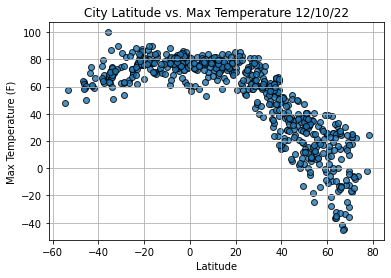

In [93]:
# Import time module

import time

# Build the scatter plot for latitude vs. max temperature. 

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties. 

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure. 

plt.savefig("weather_data/Fig1.png")

# Show plot. 

plt.show()

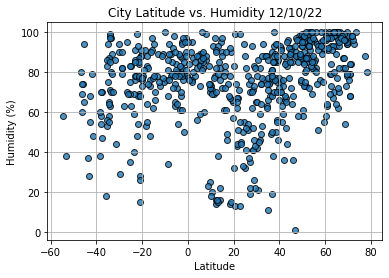

In [95]:
# Import time module

import time

# Build the scatter plot for latitude vs. humidity. 

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties. 

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure. 

plt.savefig("weather_data/Fig2.png")

# Show plot. 

plt.show()

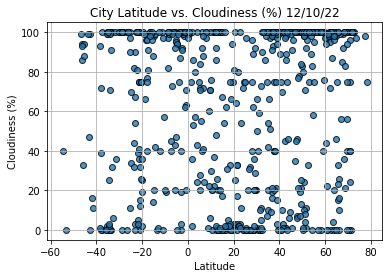

In [96]:
# Import time module

import time

# Build the scatter plot for latitude vs. cloudiness. 

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties. 

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure. 

plt.savefig("weather_data/Fig3.png")

# Show plot. 

plt.show()

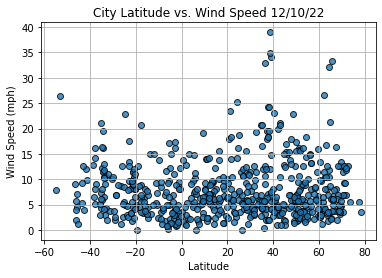

In [97]:
# Import time module

import time

# Build the scatter plot for latitude vs. wind speed. 

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties. 

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure. 

plt.savefig("weather_data/Fig4.png")

# Show plot. 

plt.show()

In [100]:
# Import linregress

from scipy.stats import linregress

# Create a function to creat perform linear regression on the weather data
# and plot a regression line and the equation with the data. 

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data. 
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept. 
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line. 
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line. 
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text from the line equation. 
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [101]:
# Creating an hemisphere dataframe. 

index13 = city_data_df.loc[13]
index13

City                  Kondinskoye
Lat                       59.6481
Lng                         67.41
Max Temp                    -2.85
Humidity                       91
Cloudiness                    100
Wind Speed                   6.69
Country                        RU
Date          2022-12-10 21:55:52
Name: 13, dtype: object

In [102]:
# Northern hemisphere dataframe test.

city_data_df["Lat"] >= 0

0       True
1      False
2      False
3      False
4      False
       ...  
591     True
592     True
593     True
594     True
595    False
Name: Lat, Length: 596, dtype: bool

In [104]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Seybaplaya,19.6500,-90.6667,85.46,57,0,10.09,MX,2022-12-10 21:55:48
7,Kavali,14.9167,79.9833,74.12,90,67,8.03,IN,2022-12-10 21:55:50
8,Qui Nhon,13.7667,109.2333,72.43,85,100,9.48,VN,2022-12-10 21:55:50
9,Honningsvag,70.9821,25.9704,24.55,68,24,9.22,NO,2022-12-10 21:55:51
10,Skibbereen,51.5500,-9.2667,35.26,86,1,5.77,IE,2022-12-10 21:55:51


In [105]:
# Create Northern and Southern Hemisphere DataFrames. 

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

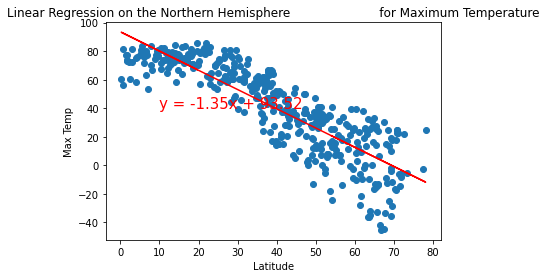

In [109]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function. 

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for Maximum Temperature', 'Max Temp',(10,40))

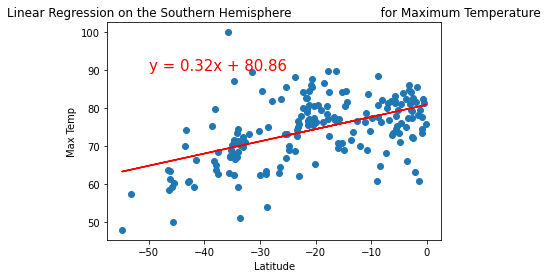

In [111]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function. 
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Southern Hemisphere \
                      for Maximum Temperature', 'Max Temp', (-50,90))

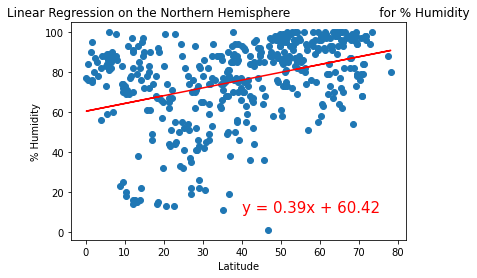

In [112]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function. 
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for % Humidity', '% Humidity', (40,10))

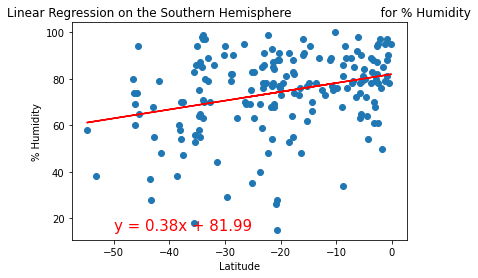

In [113]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Southern Hemisphere \
                      for % Humidity', '% Humidity', (-50,15))

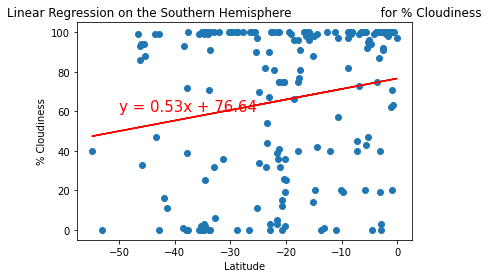

In [115]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for % Cloudiness', '% Cloudiness', (-50,60))

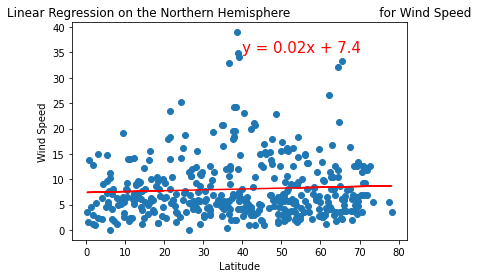

In [117]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function. 

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for Wind Speed', 'Wind Speed', (40,35))

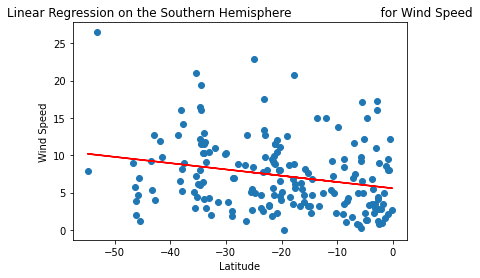

In [118]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function. 

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for Wind Speed', 'Wind Speed',(-50,35))